# **`Flourishing Analysis`** <a id="index"></a>
0. [**IMPORTING THE DATASET & PREPROCESSING**](#intro)

1. [**UNIVARIATE DATA ANALYSIS**](#uda)<br>
  1.1 *[Categorical Variables](#cava)<br>*
  1.2 *[Quantitative Variables](#quva)<br>*

2. [**BIVARIATE DATA ANALYSIS**](#bda)
  <br>2.1 *[Both Categorical](#boca)*
  <br>2.2 *[Both Quantitative](#boqu)*
  <br>2.3 *[Categorical & Quantitative](#mix)<br>*

3. [**MODELING**](#modeling)<br>
  3.1 [**Supervised Learning (Regression)**](#slr)<BR>
  3.1.1 *[Linear Regression](#lr)*<BR>
  3.1.2 *[KNN Regression](#knnr)*<BR>
  3.2 [**Supervised Learning (Classification)**](#slc)<BR>
  3.2.1 *[Logistic Regression](#lor)*<BR>
  3.2.2 *[KNN Classification](#knnc)*<BR>
  3.3 [**Unsupervised Learning**](#ul)<BR>
  3.3.1 *[Principal Component Analysis (Rows)](#pcar)*<BR>
  3.3.2 *[Principal Component Analysis (Variables)](#pcav)*

# **`Importing the Dataset & Preprocessing`** <a id="intro"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./Flourishing_248_HD.xlsx", header=0)
df

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33
...,...,...,...,...,...,...,...,...,...,...,...
243,242,37,6,1,3,1,22,2,43,1.650000,21
244,318,31,6,2,3,1,21,2,35,0.384615,21
245,502,29,6,2,1,1,39,1,25,0.527778,33
246,98,59,5,1,2,1,31,1,28,0.585366,26


In [3]:
df.set_index("ID", inplace=True)

In [4]:
df = df.replace({"sex" : {1: "male", 2: "female"}, 
                 "famstatus" : {1: "single", 2: "separate", 3: "couple"}})
df = df.replace({"education" : {1: "not completed HS", 2: "high school", 
                                3: "up to 2y after HS", 4: "up to 3y after HS", 5: "up to 4y after HS", 6: "5y or more after HS"}})
df = df.replace({"pro_cat" : {1: "languishing", 2: "moderately mentally healthy", 3:"flourishing"}})
df = df.replace({"priv_cat" : {1: "languishing", 2: "moderately mentally healthy", 3:"flourishing"}})
df

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
ID,,,,,,,,,,
344,72,5y or more after HS,female,separate,flourishing,82,flourishing,83,4.142857,44
317,45,5y or more after HS,female,separate,flourishing,81,flourishing,83,4.000000,44
444,43,up to 4y after HS,male,single,flourishing,79,flourishing,78,5.000000,47
270,60,high school,female,couple,flourishing,79,flourishing,82,4.666667,42
52,49,high school,female,separate,flourishing,77,flourishing,73,2.285714,33
...,...,...,...,...,...,...,...,...,...,...
242,37,5y or more after HS,male,couple,languishing,22,moderately mentally healthy,43,1.650000,21
318,31,5y or more after HS,female,couple,languishing,21,moderately mentally healthy,35,0.384615,21
502,29,5y or more after HS,female,single,languishing,39,languishing,25,0.527778,33


In [5]:
conditions = [(df['positivity'] < 1), (df['positivity'] >= 1) & (df['positivity'] < 2),
    (df['positivity'] >= 2) & (df['positivity'] < 3), (df['positivity'] >= 3)]

categories = ["depressed", "languishing", "moderately emotionally healthy", "emotionally flourishing"]
df["pos_cat"] = np.select(conditions, categories)

df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
ID,,,,,,,,,,,
344,72,5y or more after HS,female,separate,flourishing,82,flourishing,83,4.142857,44,emotionally flourishing
317,45,5y or more after HS,female,separate,flourishing,81,flourishing,83,4.000000,44,emotionally flourishing
444,43,up to 4y after HS,male,single,flourishing,79,flourishing,78,5.000000,47,emotionally flourishing
270,60,high school,female,couple,flourishing,79,flourishing,82,4.666667,42,emotionally flourishing
52,49,high school,female,separate,flourishing,77,flourishing,73,2.285714,33,moderately emotionally healthy


In [6]:
# reordering the dataframe
reordered = [ "age", "sex", "education", "famstatus", "pro_cat", 
                 "pro_quant", "priv_quant", "positivity", "pos_cat", "flow"] 
df = df[reordered]

df.head()

,age,sex,education,famstatus,pro_cat,pro_quant,priv_quant,positivity,pos_cat,flow
ID,,,,,,,,,,
344,72,female,5y or more after HS,separate,flourishing,82,83,4.142857,emotionally flourishing,44
317,45,female,5y or more after HS,separate,flourishing,81,83,4.000000,emotionally flourishing,44
444,43,male,up to 4y after HS,single,flourishing,79,78,5.000000,emotionally flourishing,47
270,60,female,high school,couple,flourishing,79,82,4.666667,emotionally flourishing,42
52,49,female,high school,separate,flourishing,77,73,2.285714,moderately emotionally healthy,33


In [7]:
print(df.dtypes) # printing the categories

age             int64
sex            object
education      object
famstatus      object
pro_cat        object
pro_quant       int64
priv_quant      int64
positivity    float64
pos_cat        object
flow            int64
dtype: object


In [8]:
object_columns = df.select_dtypes(include=["object"]).columns

pd.options.mode.chained_assignment = None # to ignore pandas warning

for column in object_columns:
    df[column] = df[column].astype("category") # changing dtype
print(df.dtypes)

pd.options.mode.chained_assignment = "warn" # reactivating warnings

age              int64
sex           category
education     category
famstatus     category
pro_cat       category
pro_quant        int64
priv_quant       int64
positivity     float64
pos_cat       category
flow             int64
dtype: object


In [9]:
df.tail()

,age,sex,education,famstatus,pro_cat,pro_quant,priv_quant,positivity,pos_cat,flow
ID,,,,,,,,,,
242,37,male,5y or more after HS,couple,languishing,22,43,1.650000,languishing,21
318,31,female,5y or more after HS,couple,languishing,21,35,0.384615,depressed,21
502,29,female,5y or more after HS,single,languishing,39,25,0.527778,depressed,33
98,59,male,up to 4y after HS,separate,languishing,31,28,0.585366,depressed,26
26,39,female,up to 2y after HS,couple,languishing,43,63,1.125000,languishing,34


# **`Step 1 - Univariate Data Analysis`** <a id="uda"></a>

1.	If the variables are categorical:
- 1.1.	Generate the summary table of each variable.
- 1.2.	Plot their Pie Chart
- 1.3.	Plot their Bar Chart

2.	If the variables are quantitative:
- 2.1.	Plot their histogram
- 2.2.	Plot their boxplot

## **`Categorical Variables`** <a id="cava"></a>

In [10]:
categorical_variables = df.select_dtypes(include=["category"])
summary_table = categorical_variables.describe()

print(summary_table)

           sex            education famstatus                      pro_cat  \
count      248                  248       248                          248   
unique       2                    6         3                            3   
top     female  5y or more after HS    couple  moderately mentally healthy   
freq       151                  110       173                          159   

            pos_cat  
count           248  
unique            4  
top     languishing  
freq            143  


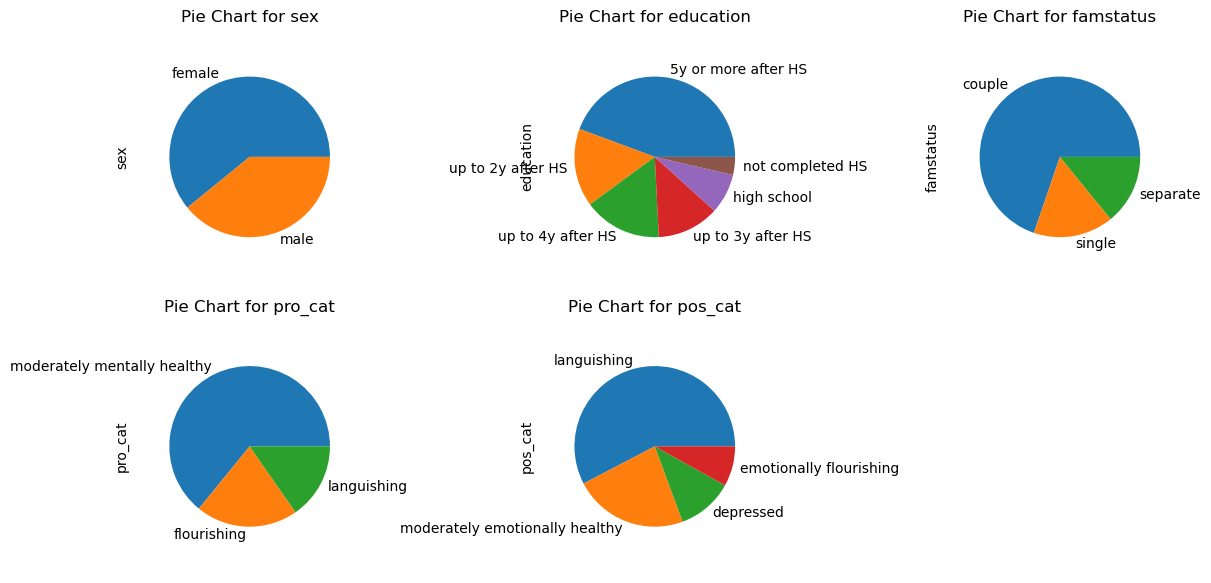

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten() # to simplify indexing

for i, column in enumerate(categorical_variables):
    ax = axes[i]
    df[column].value_counts().plot(kind="pie", ax=ax)
    ax.set_title(f"Pie Chart for {column}")
    ax.axis("equal")  # Equal aspect ratio ensures that pie chart is circular

fig.delaxes(axes[5]) # I'm hiding the empty subplot
    
plt.tight_layout()
plt.show()

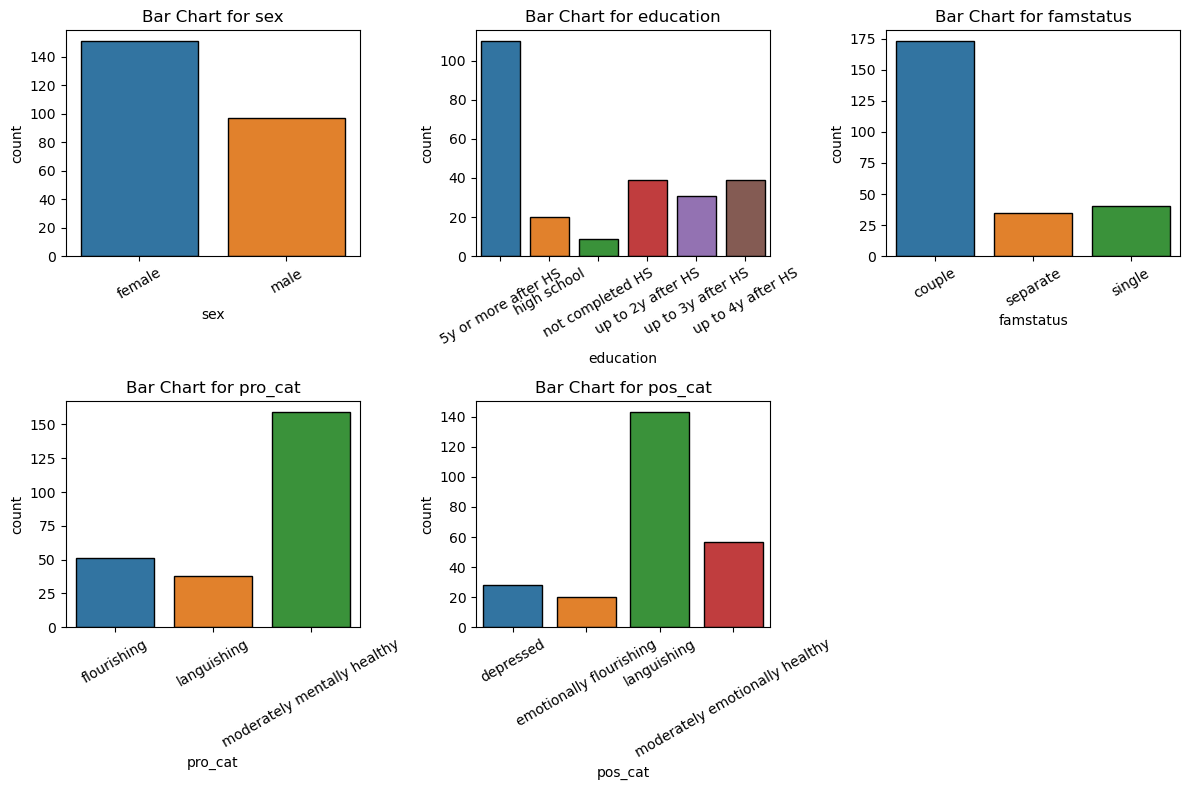

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(categorical_variables):
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax, edgecolor="k")
    ax.set_title(f"Bar Chart for {column}")
    ax.tick_params(axis="x", rotation=30)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## **`Quantitative Variables`** <a id="quva"></a>

In [13]:
quantitative_variables = df.select_dtypes(include=["int", "float"])

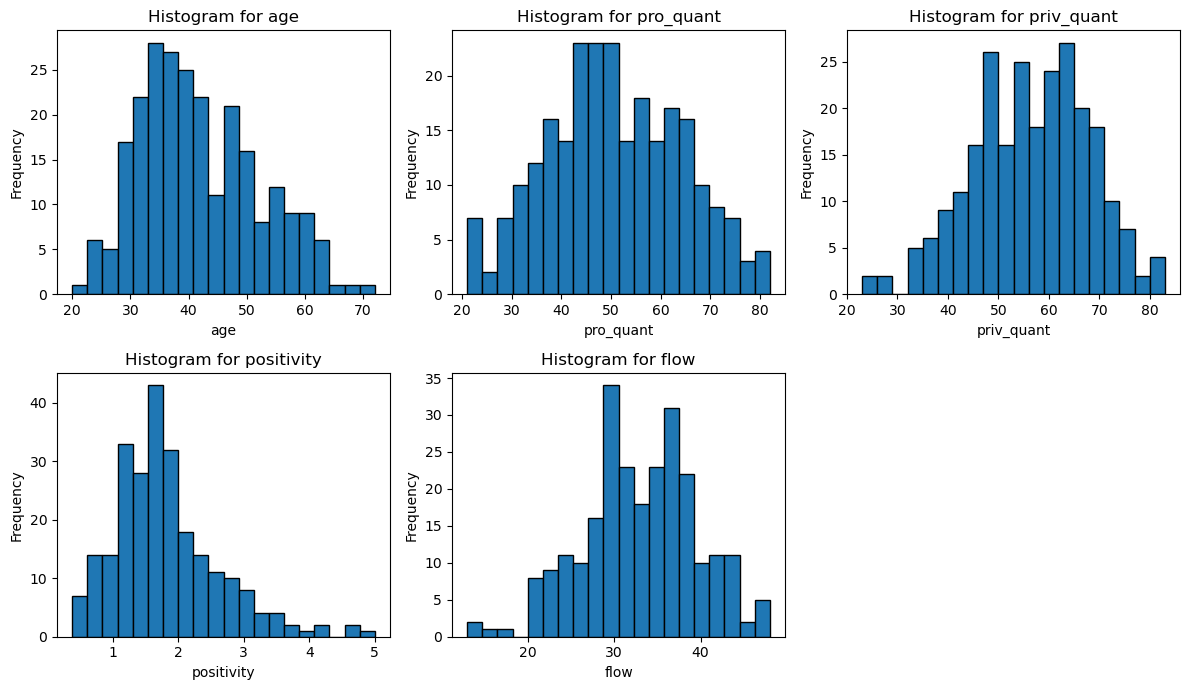

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.flatten()

for i, column in enumerate(quantitative_variables):
    ax = axes[i]
    df[column].plot(kind="hist", ax=ax, bins=20, edgecolor="k")
    ax.set_title(f"Histogram for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

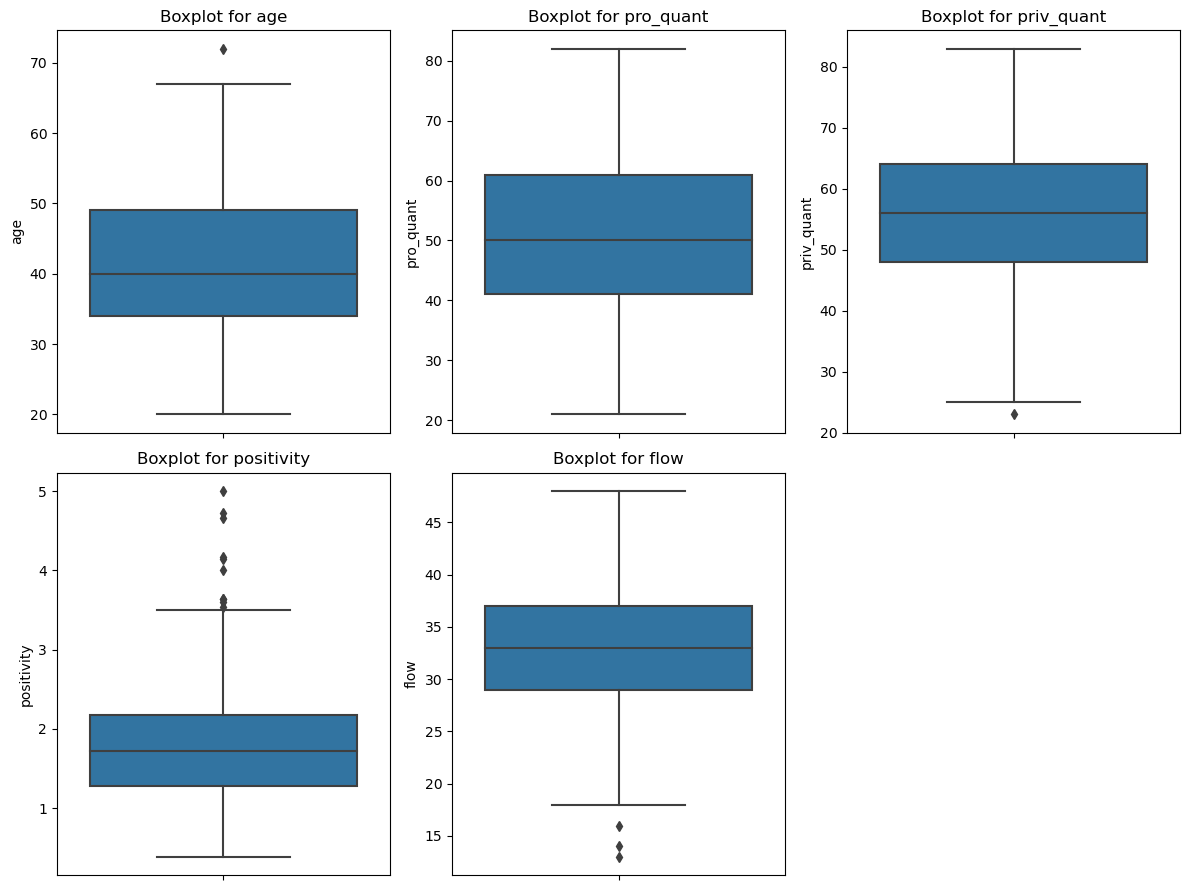

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 9))
axes = axes.flatten()

for i, column in enumerate(quantitative_variables):
    ax = axes[i]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_title(f"Boxplot for {column}")
    ax.set_ylabel(column)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# **`Step 2 – Bivariate Data Analysis`** <a id="bda"></a>

1.	If the variables are both categorical:
- 1.1.	Generate the contingency table
- 1.2.	Check the significance of their relationship with the chi-square test & provide Cramer’s V
- 1.3.	Plot their side-by-side bar charts
- 1.4.	Plot their stacked bar charts

2.	If the variables are both quantitative:
- 2.1.	Compute the correlation (table)
- 2.2.	Check the significance of their relationship with the correlation test & provide the r value
- 2.3.	Plot their scatter plot (matrix)

3.	If the variables are mixed categorical & quantitative:
- 3.1.	Compute the anova table
- 3.2.	Check the significance of the difference in values between groups
- 3.3.	Plot the grouped boxplots

## **`Both Categorical`** <a id="boca"></a>

In [16]:
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i < j:
            contingency_table = pd.crosstab(df[var1], df[var2])
            print(f"Contingency Table for {var1} vs {var2}:\n{contingency_table}")

Contingency Table for sex vs education:
education  5y or more after HS  high school  not completed HS  \
sex                                                             
female                      67           12                 5   
male                        43            8                 4   

education  up to 2y after HS  up to 3y after HS  up to 4y after HS  
sex                                                                 
female                    23                 22                 22  
male                      16                  9                 17  
Contingency Table for sex vs famstatus:
famstatus  couple  separate  single
sex                                
female         99        29      23
male           74         6      17
Contingency Table for sex vs pro_cat:
pro_cat  flourishing  languishing  moderately mentally healthy
sex                                                           
female            29           24                           98
male        

In [17]:
from scipy.stats import chi2_contingency

categorical_variables = ["sex", "education", "famstatus", "pro_cat", "pos_cat"]  # replace with your column names

# create an empty dictionary to store contingency tables
contingency_tables = {}

# loop through each pair of categorical variables
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i < j:
            contingency_table = pd.crosstab(df[var1], df[var2])

            # store the contingency table in the dictionary with a tuple key
            contingency_tables[(var1, var2)] = contingency_table

for var_pair, contingency_table in contingency_tables.items():
    var1, var2 = var_pair
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square statistic for {var1} vs {var2}: {chi2}")
    print(f"P-value: {p}")

Chi-square statistic for sex vs education: 1.8249843705978068
P-value: 0.872792808219094
Chi-square statistic for sex vs famstatus: 8.26058510895296
P-value: 0.01607817439257878
Chi-square statistic for sex vs pro_cat: 0.4664780874312233
P-value: 0.7919642368215398
Chi-square statistic for sex vs pos_cat: 4.90325105824885
P-value: 0.17902021519630862
Chi-square statistic for education vs famstatus: 10.217108543351317
P-value: 0.42165665979460965
Chi-square statistic for education vs pro_cat: 11.946738012092295
P-value: 0.28863694985086
Chi-square statistic for education vs pos_cat: 26.869523322545042
P-value: 0.029817582810017444
Chi-square statistic for famstatus vs pro_cat: 2.99164546865293
P-value: 0.5592244833296824
Chi-square statistic for famstatus vs pos_cat: 4.9759303085544975
P-value: 0.5469039361473955
Chi-square statistic for pro_cat vs pos_cat: 93.42675745918187
P-value: 5.8759549730946244e-18


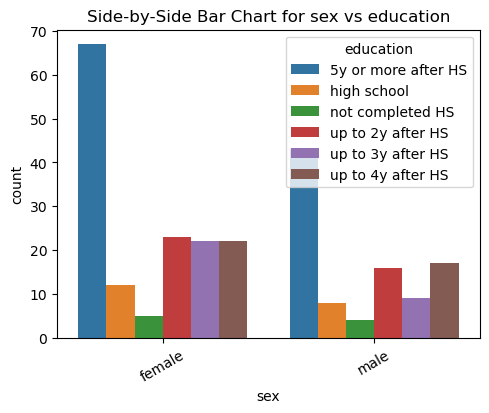

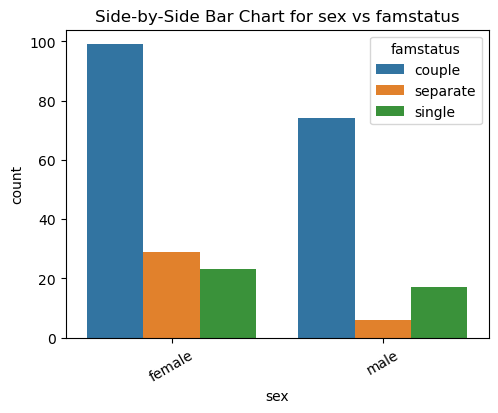

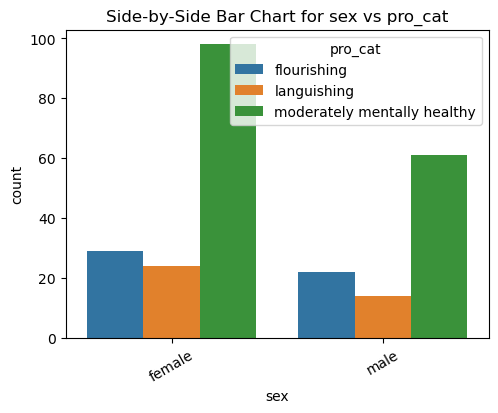

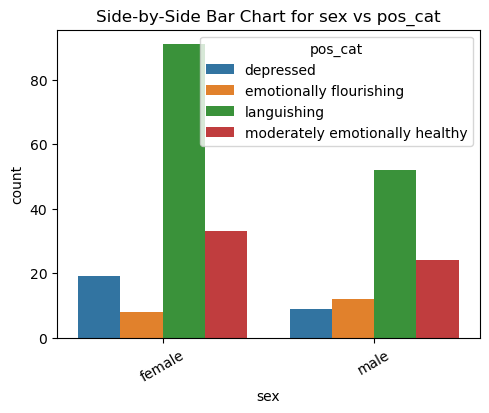

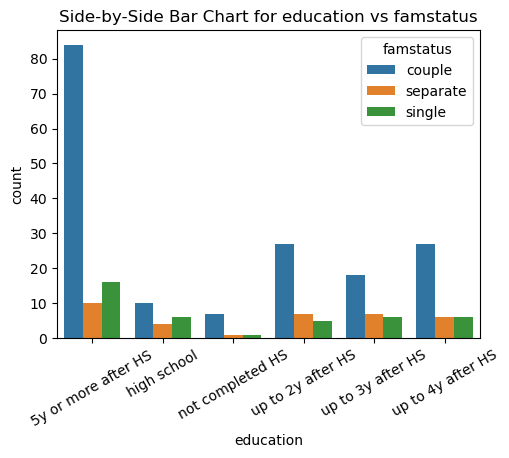

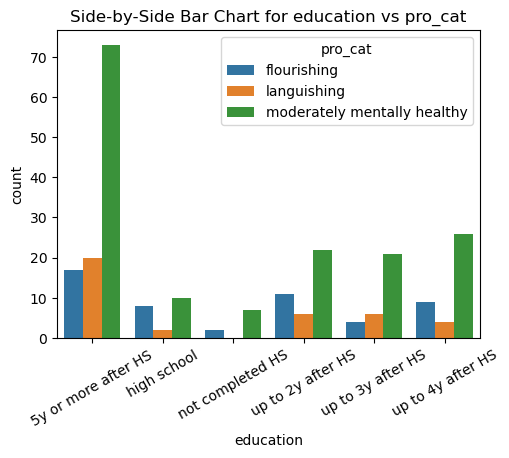

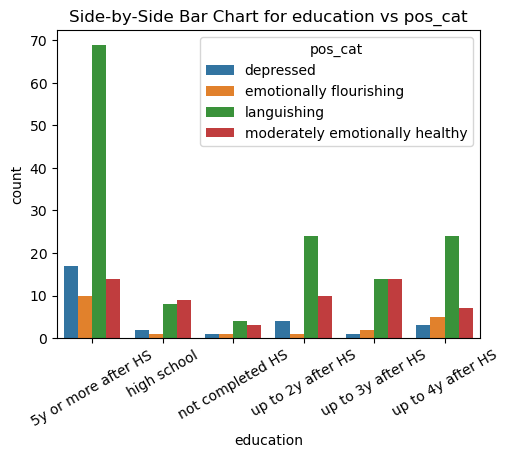

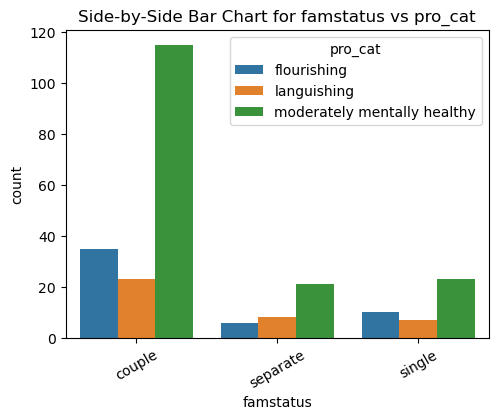

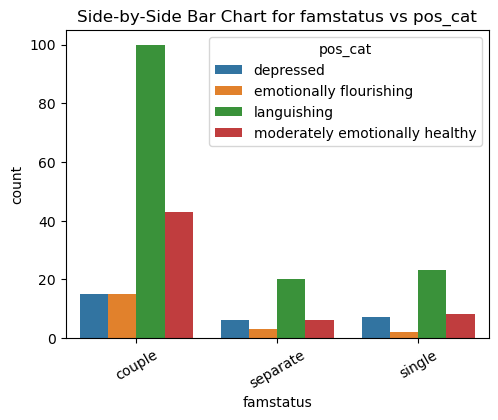

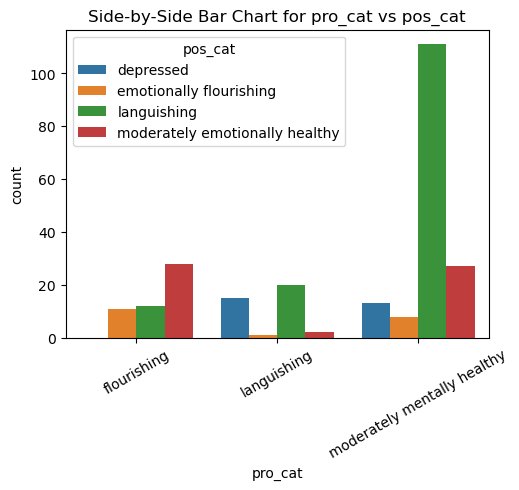

In [18]:
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i < j:
            
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.countplot(data=df, x=var1, hue=var2)
            plt.xlabel(var1)
            plt.xticks(rotation=30)
            plt.title(f"Side-by-Side Bar Chart for {var1} vs {var2}")
            

/var/folders/tx/rms44hrd7s1czr0jh7w4rgsm0000gn/T/ipykernel_42139/868752326.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

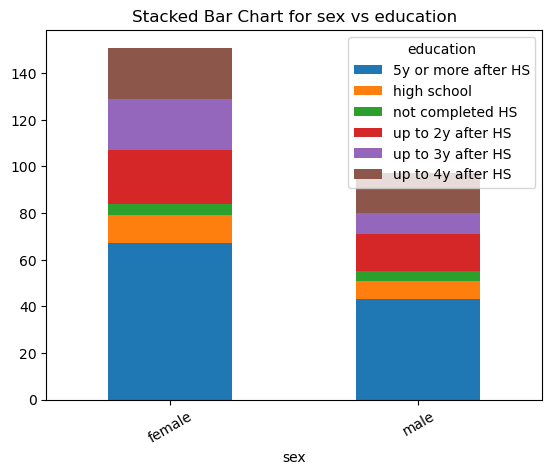

<Figure size 1200x400 with 0 Axes>

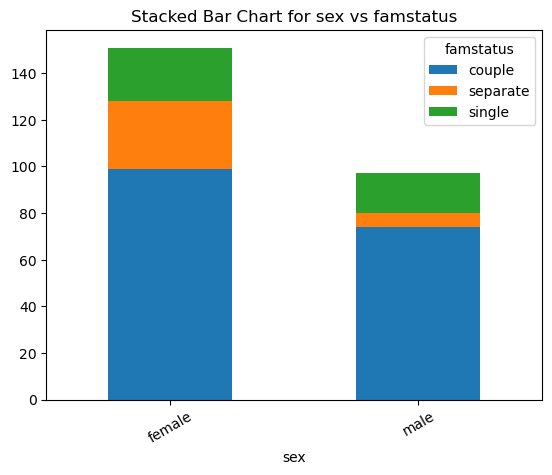

<Figure size 1200x400 with 0 Axes>

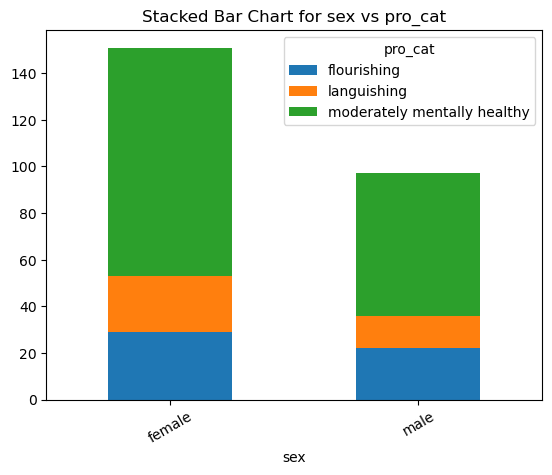

<Figure size 1200x400 with 0 Axes>

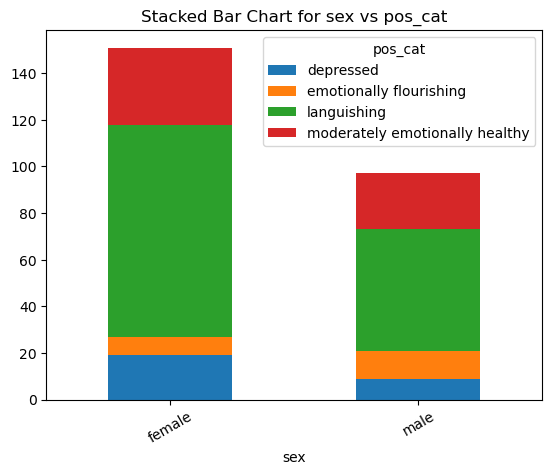

<Figure size 1200x400 with 0 Axes>

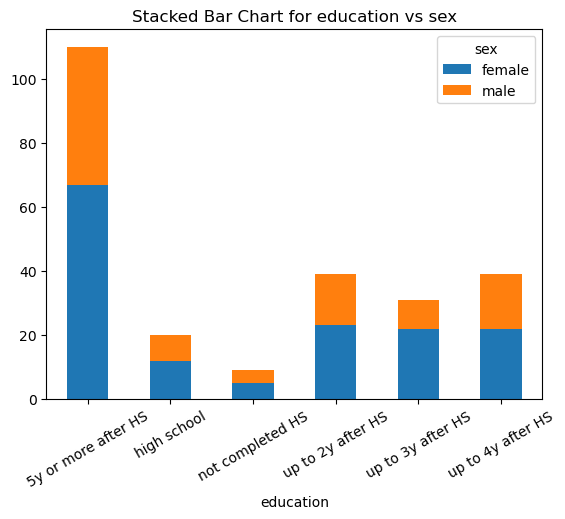

<Figure size 1200x400 with 0 Axes>

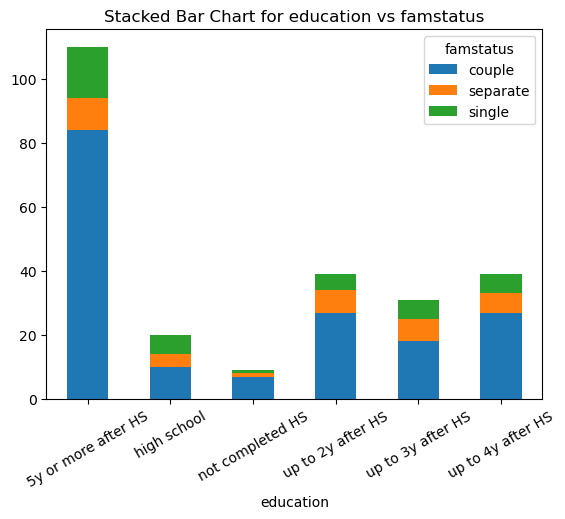

<Figure size 1200x400 with 0 Axes>

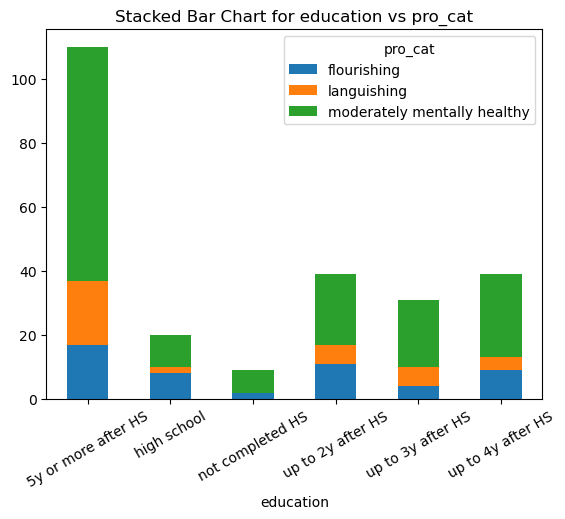

<Figure size 1200x400 with 0 Axes>

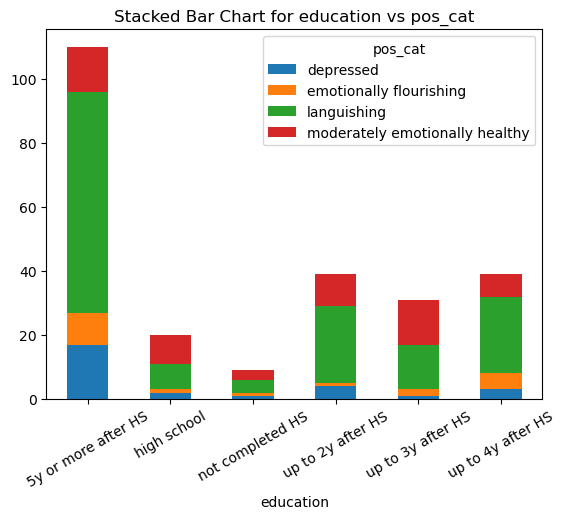

<Figure size 1200x400 with 0 Axes>

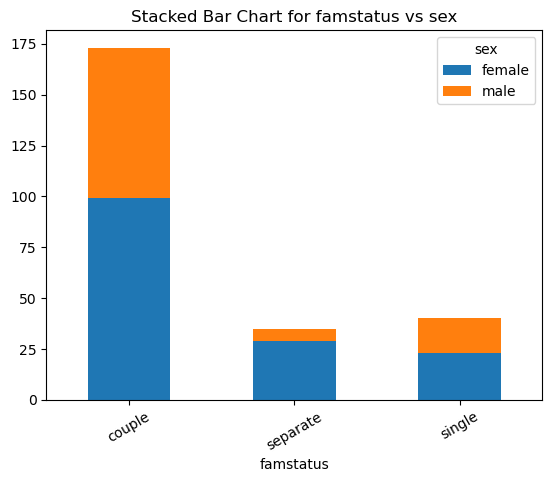

<Figure size 1200x400 with 0 Axes>

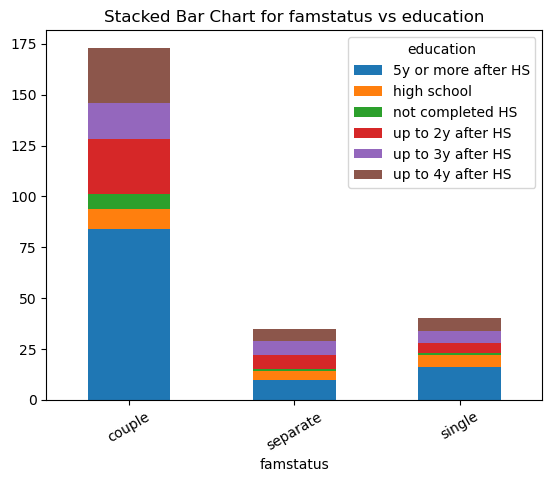

<Figure size 1200x400 with 0 Axes>

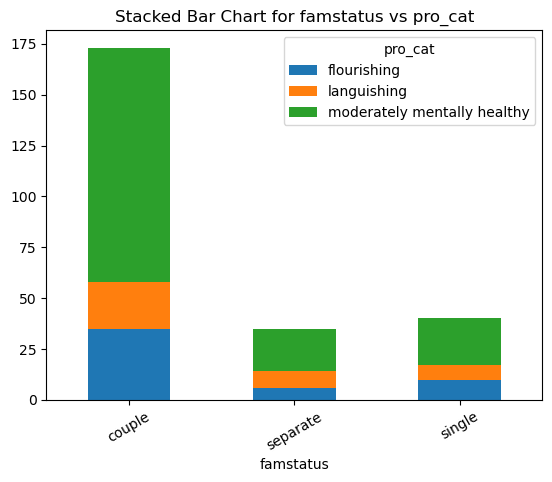

<Figure size 1200x400 with 0 Axes>

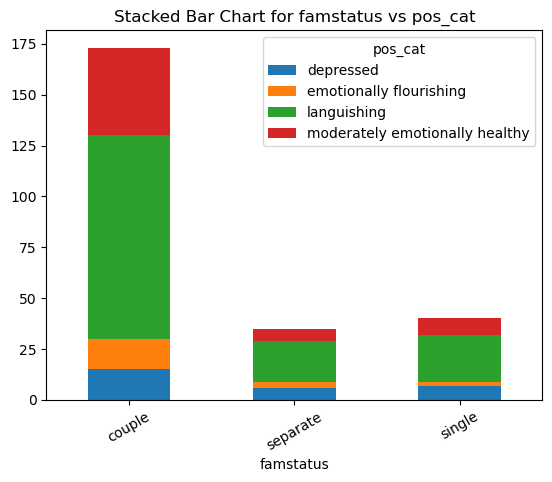

<Figure size 1200x400 with 0 Axes>

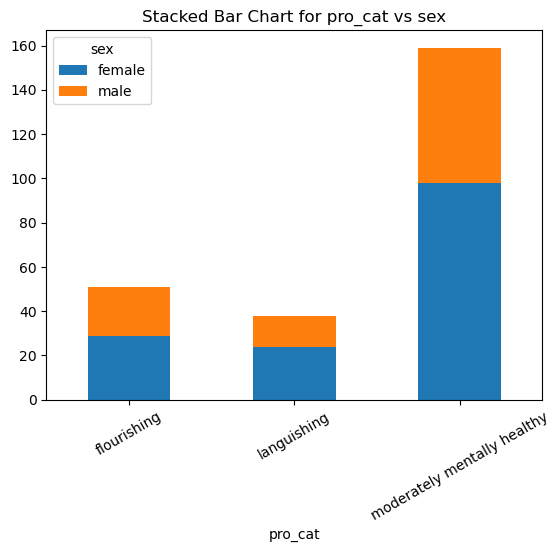

<Figure size 1200x400 with 0 Axes>

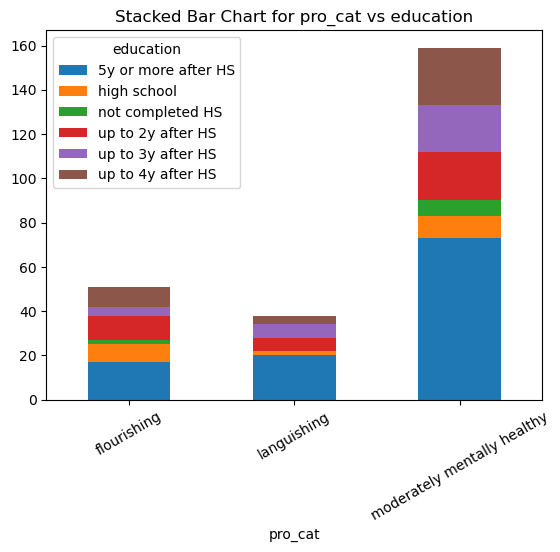

<Figure size 1200x400 with 0 Axes>

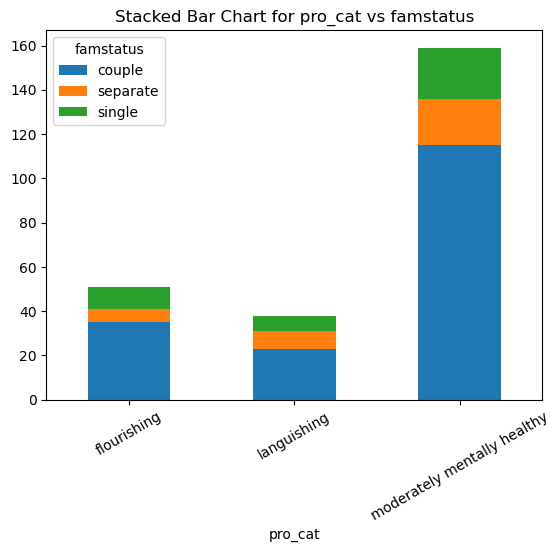

<Figure size 1200x400 with 0 Axes>

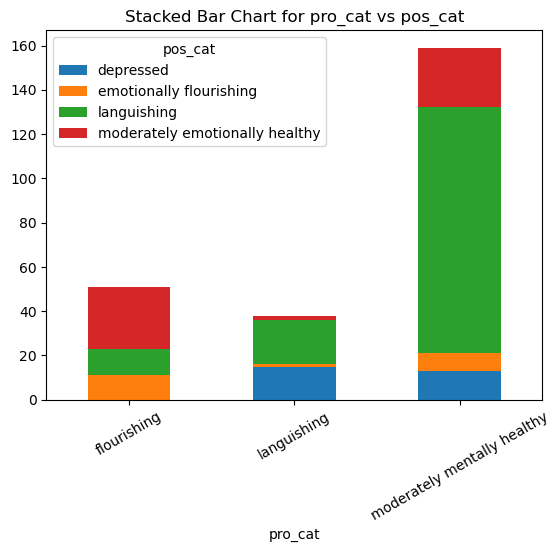

<Figure size 1200x400 with 0 Axes>

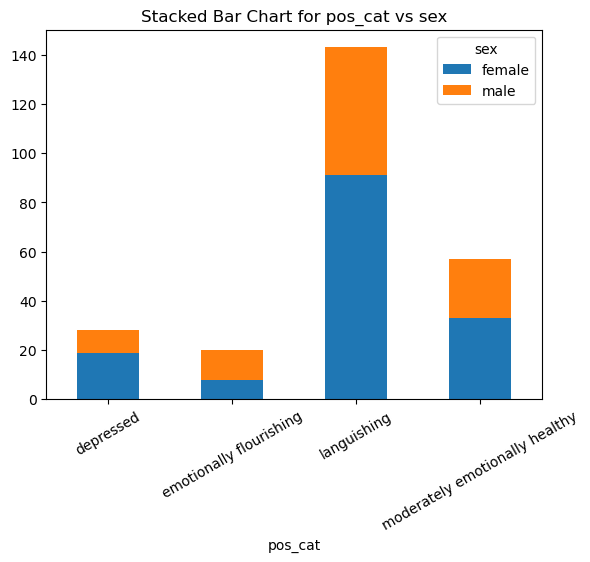

<Figure size 1200x400 with 0 Axes>

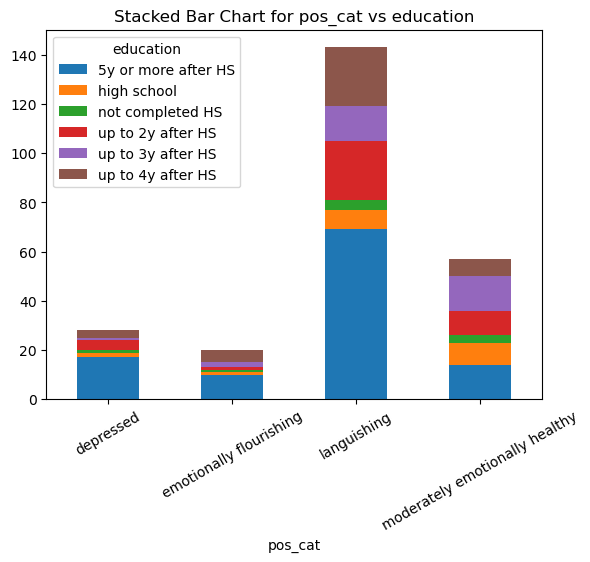

<Figure size 1200x400 with 0 Axes>

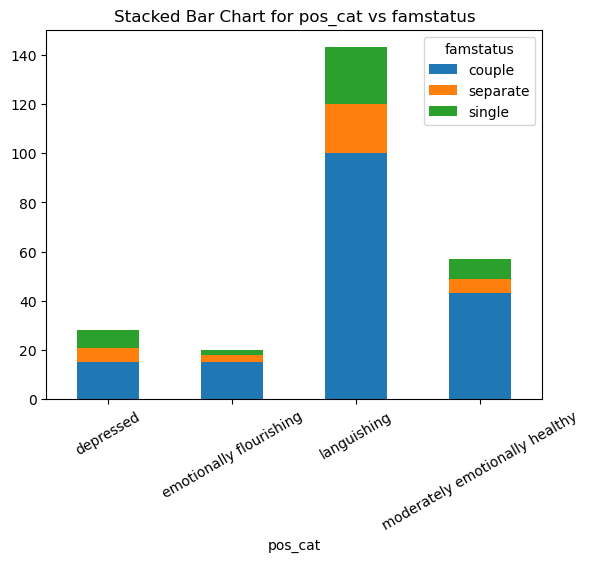

<Figure size 1200x400 with 0 Axes>

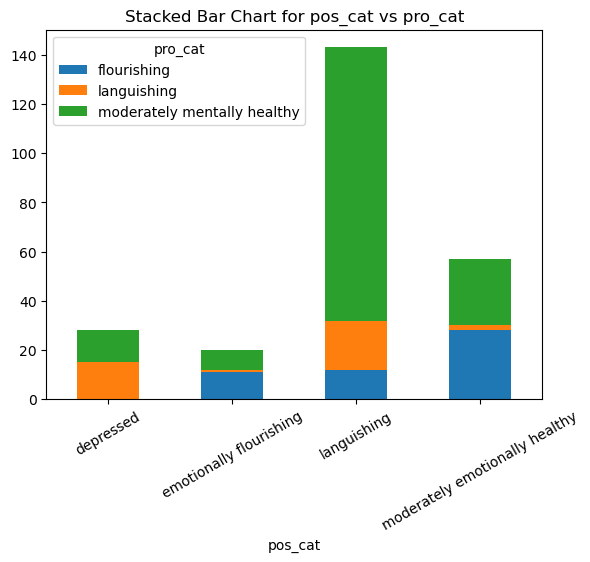

In [19]:
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i != j:
        
            plt.figure(figsize=(12, 4))
            
            # Pivot the data for creating stacked bar chart (ChatGPT)
            stacked_data = df.groupby([var1, var2]).size().unstack().fillna(0) 
            
            stacked_data.plot(kind='bar', stacked=True)
            plt.xlabel(var1)
            plt.xticks(rotation=30)
            plt.title(f'Stacked Bar Chart for {var1} vs {var2}')

plt.show()

## **`Both Quantitative`** <a id="boqu"></a>

In [20]:
corr_table = quantitative_variables.corr()
corr_table

,age,pro_quant,priv_quant,positivity,flow
age,1.000000,0.229625,0.151607,0.257054,0.367994
pro_quant,0.229625,1.000000,0.635679,0.603502,0.536229
priv_quant,0.151607,0.635679,1.000000,0.636000,0.409439
positivity,0.257054,0.603502,0.636000,1.000000,0.439782
flow,0.367994,0.536229,0.409439,0.439782,1.000000


<Axes: >

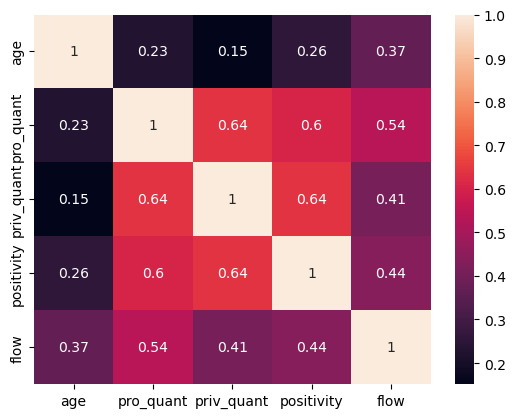

In [21]:
sns.heatmap(corr_table, annot=True)

In [22]:
from scipy.stats import pearsonr

for i, var1 in enumerate(quantitative_variables):
    for j, var2 in enumerate(quantitative_variables):
        if i < j:
            variable1 = df[var1]
            variable2 = df[var2]
            r, p = pearsonr(variable1, variable2)
            print(f"Correlation coefficient (r) between {var1} and {var2}: {r}")
            print(f"p-value between {var1} and {var2}: {p}")

Correlation coefficient (r) between age and pro_quant: 0.2296249011937738
p-value between age and pro_quant: 0.2296249011937738: 0.0002656135100247766
Correlation coefficient (r) between age and priv_quant: 0.15160657829757487
p-value between age and priv_quant: 0.15160657829757487: 0.016881986118607358
Correlation coefficient (r) between age and positivity: 0.25705383156317474
p-value between age and positivity: 0.25705383156317474: 4.1910616402596395e-05
Correlation coefficient (r) between age and flow: 0.36799398101848513
p-value between age and flow: 0.36799398101848513: 2.2735848758952843e-09
Correlation coefficient (r) between pro_quant and priv_quant: 0.6356793105641754
p-value between pro_quant and priv_quant: 0.6356793105641754: 1.7686137882164033e-29
Correlation coefficient (r) between pro_quant and positivity: 0.603502060289249
p-value between pro_quant and positivity: 0.603502060289249: 5.364549412068548e-26
Correlation coefficient (r) between pro_quant and flow: 0.53622924

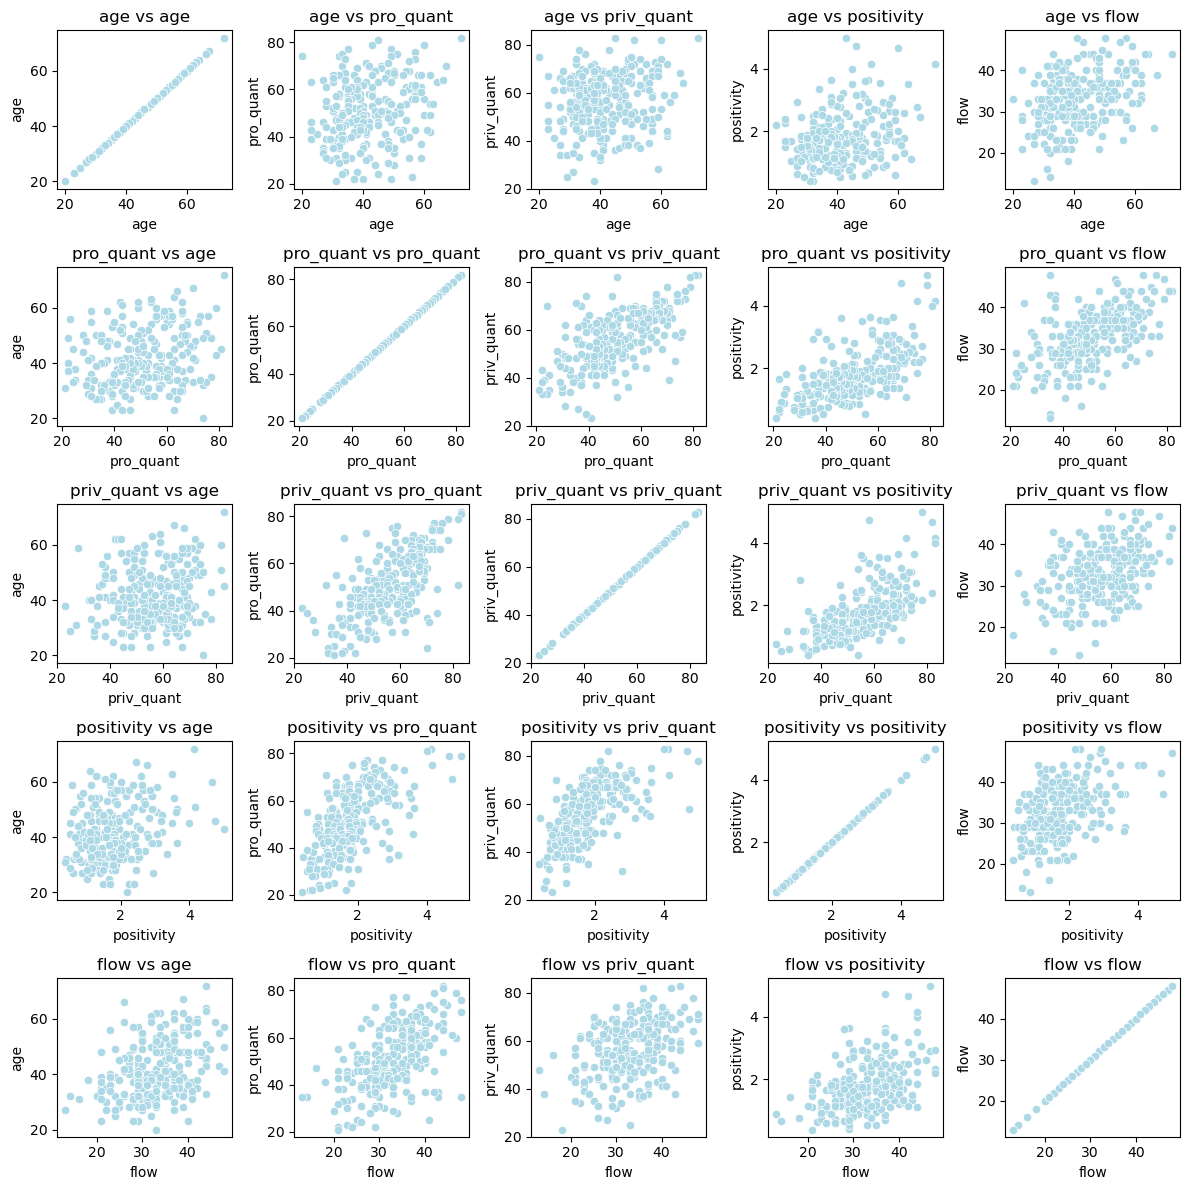

In [23]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

for i, var1 in enumerate(quantitative_variables):
    for j, var2 in enumerate(quantitative_variables):
        if i < 5 and j < 5:
            ax = axes[i, j]
            sns.scatterplot(data=df, x=var1, y=var2, ax=ax, color="lightblue")
            ax.set_title(f"{var1} vs {var2}")

plt.tight_layout()
plt.show()

## **`Categorical & Quantitative`** <a id="mix"></a>

ANOVA for sex vs age:
F-statistic: 0.40149335527752095
P-value: 0.5269077121187967


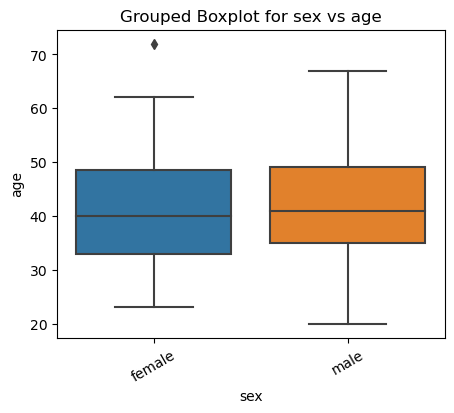

ANOVA for sex vs pro_quant:
F-statistic: 0.8563289565133827
P-value: 0.3556749365770713


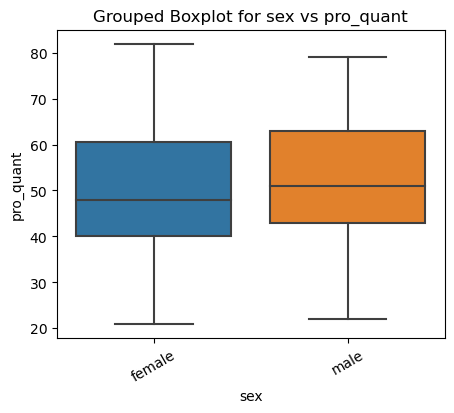

ANOVA for sex vs priv_quant:
F-statistic: 0.015610689413731636
P-value: 0.9006709179497444


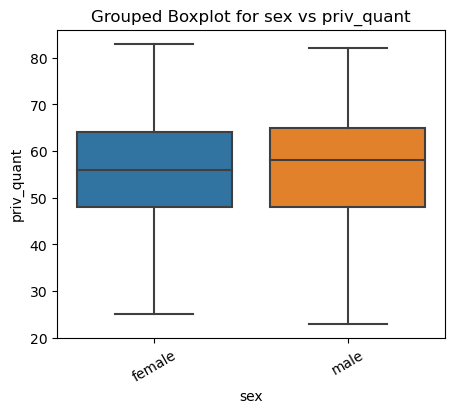

ANOVA for sex vs positivity:
F-statistic: 4.430542691130254
P-value: 0.036315777171445934


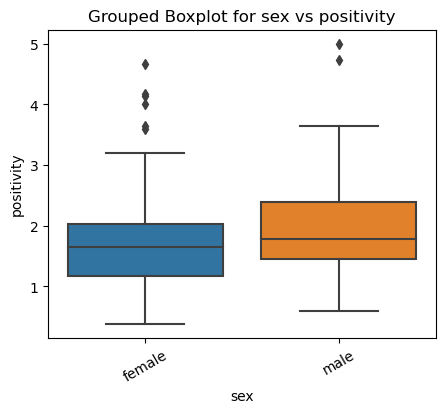

ANOVA for sex vs flow:
F-statistic: 0.4836053338827953
P-value: 0.4874501604405136


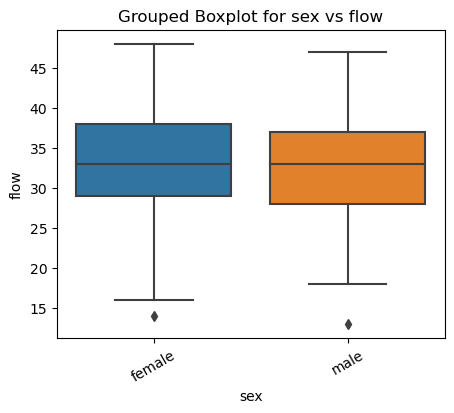

ANOVA for education vs age:
F-statistic: 1.9000092078817206
P-value: 0.09498308797275642


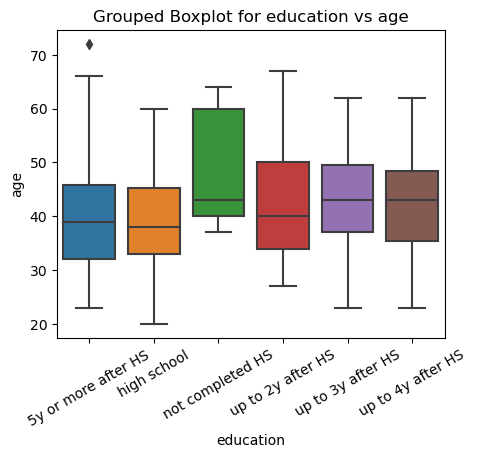

ANOVA for education vs pro_quant:
F-statistic: 2.4707944193736817
P-value: 0.03313846584639675


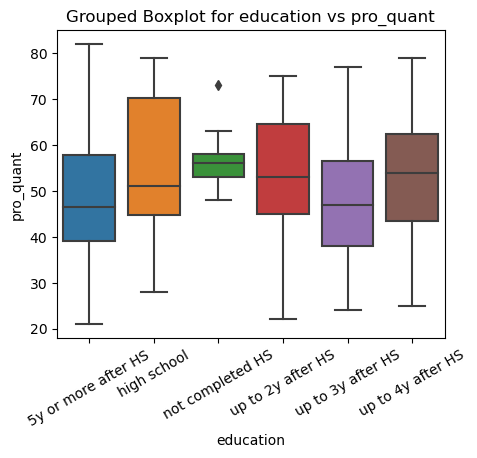

ANOVA for education vs priv_quant:
F-statistic: 1.3979433172984113
P-value: 0.2256571310448555


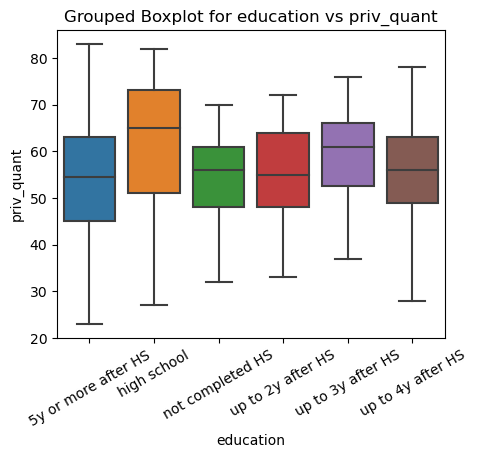

ANOVA for education vs positivity:
F-statistic: 1.4170463838481546
P-value: 0.218671663061582


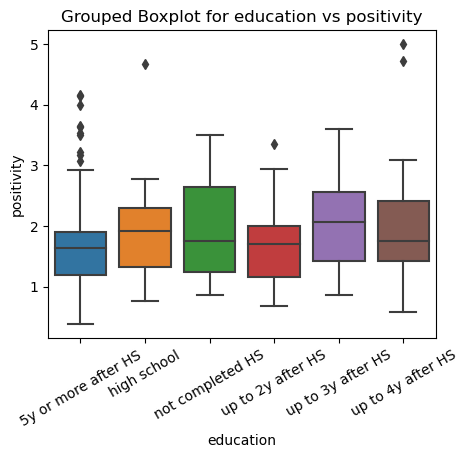

ANOVA for education vs flow:
F-statistic: 3.74889198574879
P-value: 0.002746687665181348


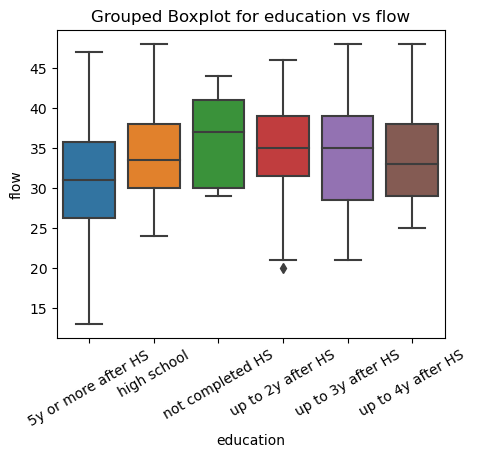

ANOVA for famstatus vs age:
F-statistic: 15.963232540676795
P-value: 3.0422768747014055e-07


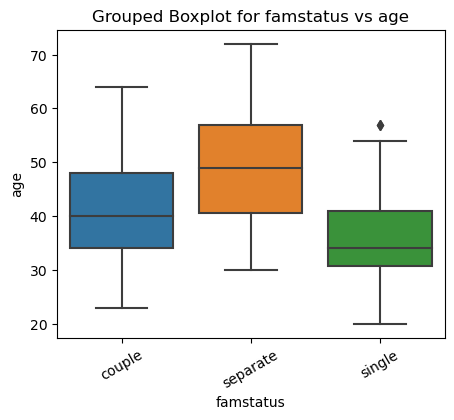

ANOVA for famstatus vs pro_quant:
F-statistic: 0.2928963357236913
P-value: 0.7463603618049064


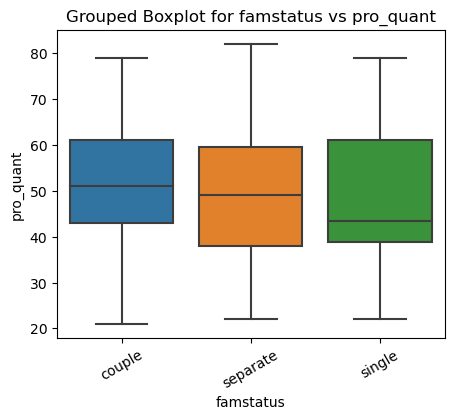

ANOVA for famstatus vs priv_quant:
F-statistic: 3.873111519819784
P-value: 0.022078660765379055


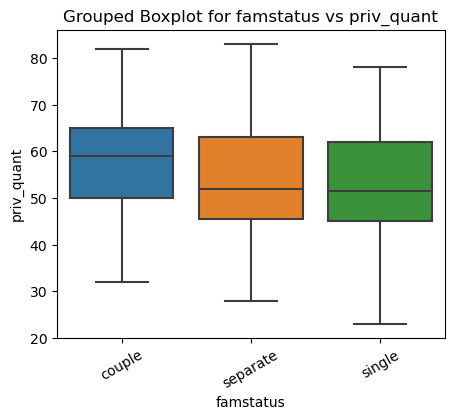

ANOVA for famstatus vs positivity:
F-statistic: 1.379431702532117
P-value: 0.25366954594961694


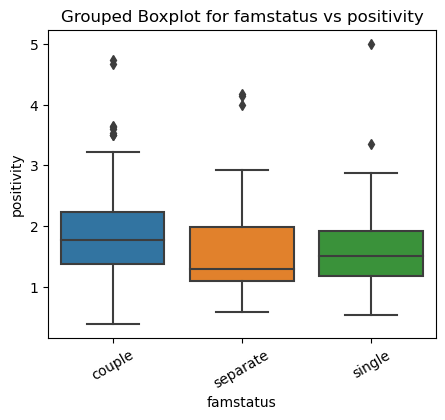

ANOVA for famstatus vs flow:
F-statistic: 1.6892796894376303
P-value: 0.1867960201258167


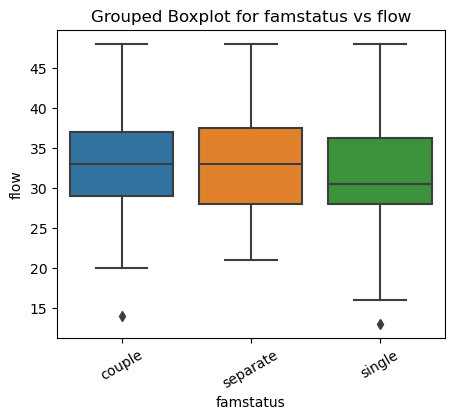

ANOVA for pro_cat vs age:
F-statistic: 4.854055421223829
P-value: 0.008562595571238018


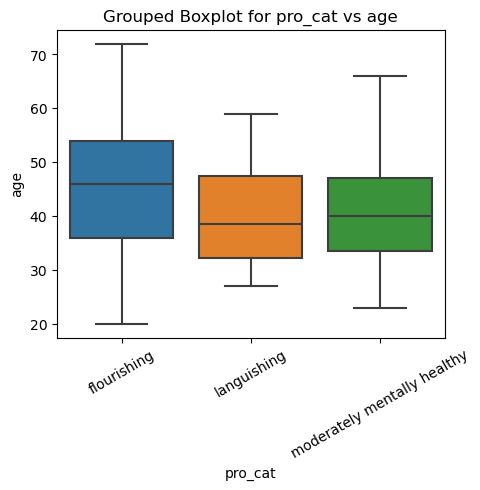

ANOVA for pro_cat vs pro_quant:
F-statistic: 324.46127773043565
P-value: 1.3759673580446063e-69


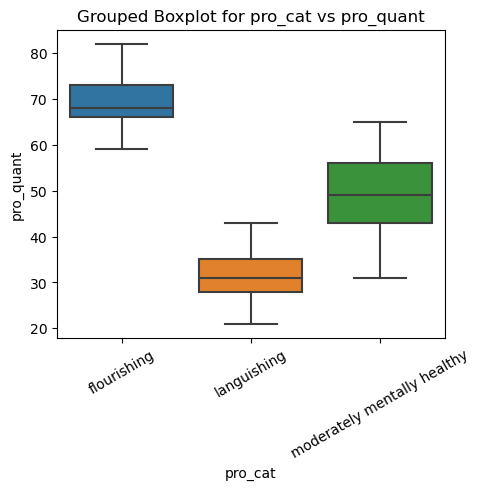

ANOVA for pro_cat vs priv_quant:
F-statistic: 55.1229519952276
P-value: 1.7101457864744627e-20


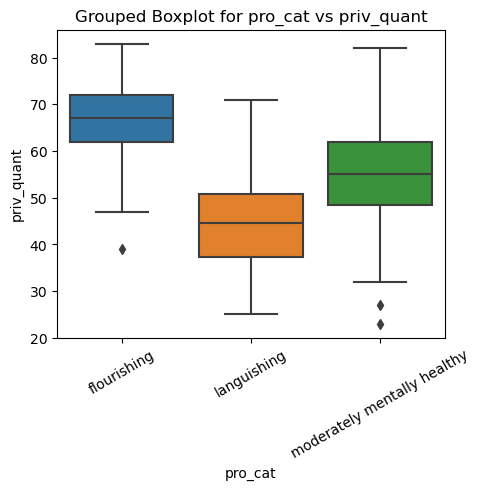

ANOVA for pro_cat vs positivity:
F-statistic: 50.083984282475484
P-value: 5.8091250977747485e-19


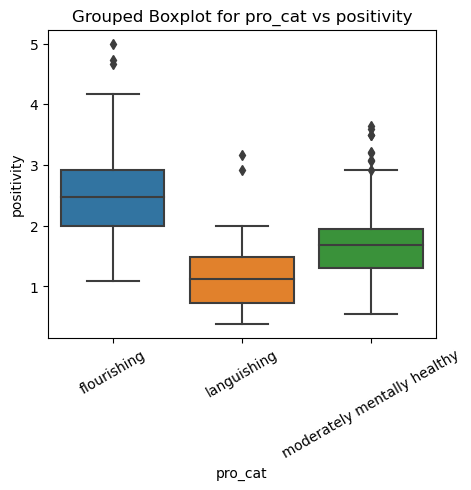

ANOVA for pro_cat vs flow:
F-statistic: 28.050154355736876
P-value: 1.0733052122974718e-11


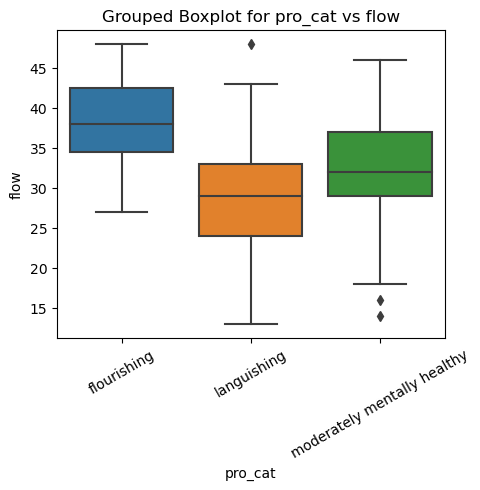

ANOVA for pos_cat vs age:
F-statistic: 5.408858302137433
P-value: 0.0012809283779706645


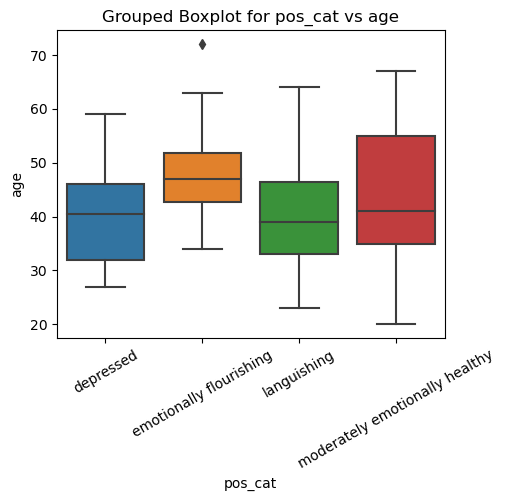

ANOVA for pos_cat vs pro_quant:
F-statistic: 43.38383495473448
P-value: 1.6622802301084777e-22


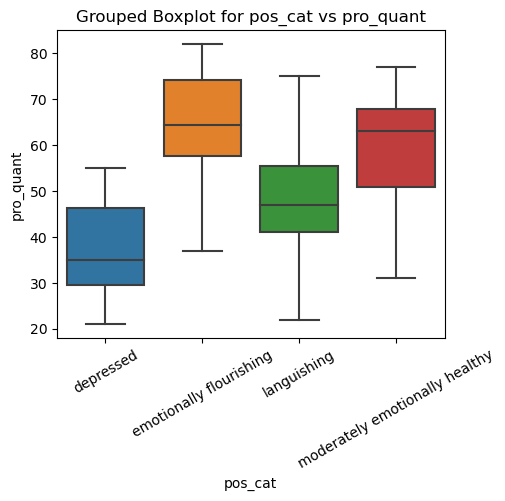

ANOVA for pos_cat vs priv_quant:
F-statistic: 48.940516032120655
P-value: 8.461717963883933e-25


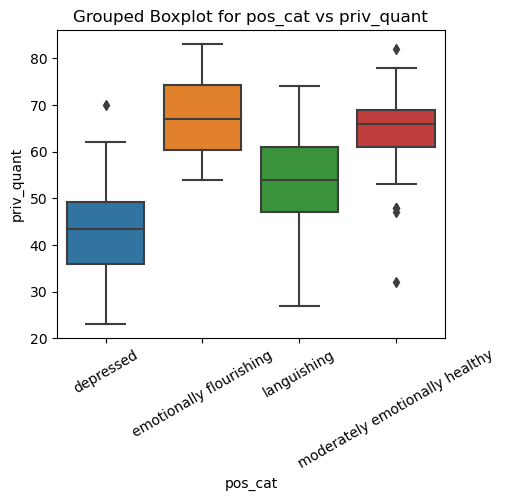

ANOVA for pos_cat vs positivity:
F-statistic: 470.60460598996707
P-value: 4.025404466298314e-101


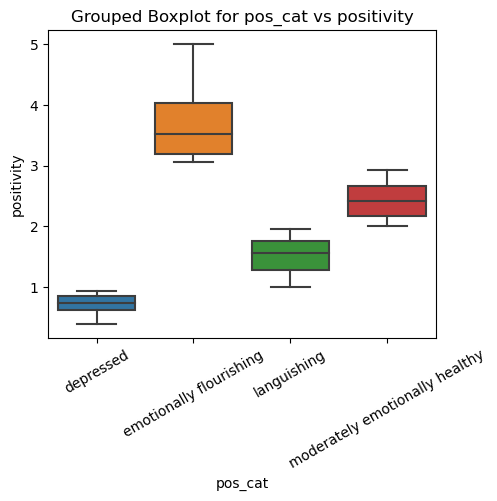

ANOVA for pos_cat vs flow:
F-statistic: 20.3637532973356
P-value: 8.236751648717522e-12


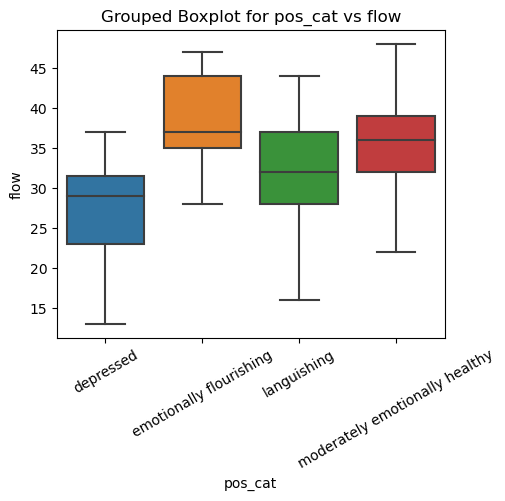

In [24]:
from scipy import stats

for cat_column in categorical_variables:
    for quant_column in quantitative_variables:
        anova_results = []
        for category in df[cat_column].unique():
            category_data = df[df[cat_column] == category][quant_column]
            anova_results.append((category, category_data))

        f_statistic, p_value = stats.f_oneway(*[result[1] for result in anova_results])

        print(f"ANOVA for {cat_column} vs {quant_column}:")
        print(f"F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")

        plt.figure(figsize=(5, 4))
        sns.boxplot(x=cat_column, y=quant_column, data=df)
        ax.set_title(f"Grouped Boxplot for {cat_column} vs {quant_column}")
        plt.title(f"Grouped Boxplot for {cat_column} vs {quant_column}")
        plt.xticks(rotation=30)

        plt.show()

# **`Step 3: Modeling`** <a id="modeling"></a>

In [25]:
X = quantitative_variables
y = df["flow"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **`Supervised Learning (Regression)`** <a id="slr"></a>


### **`Linear Regression`** <a id="lr"></a>

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Metrics")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Linear Regression Metrics:
MAE: 7.673861546209083e-15
MSE: 1.040034217443382e-28
R-squared: 1.0


### **`KNN Regression`** <a id="knnr"></a>

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"K-Nearest Neighbors Regressor Metrics")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

K-Nearest Neighbors Regressor Metrics:
MAE: 2.388
MSE: 9.612
R-squared: 0.7730878186968838


## **`Supervised Learning (Classification)`** <a id="slc"></a>

### **`Logistic Regression`** <a id="lor"></a>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=2000) # increased the number of iterations
logistic_model.fit(X_train, y_train) 

y_pred = logistic_model.predict(X_test)

/Users/martino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, zero_division=1)) # zero_division to control UndefinedMetricWarning
print('Confusion Matrix:\n', confusion)

Accuracy: 0.2
              precision    recall  f1-score   support

          14       0.00      1.00      0.00         0
          18       0.00      1.00      0.00         0
          21       1.00      1.00      1.00         2
          22       1.00      0.00      0.00         1
          23       1.00      0.00      0.00         3
          24       1.00      0.00      0.00         1
          25       0.50      0.50      0.50         2
          26       0.00      0.00      1.00         2
          27       0.00      0.00      1.00         1
          28       0.00      0.00      1.00         4
          29       0.25      1.00      0.40         1
          30       0.00      0.00      1.00         1
          31       0.00      1.00      0.00         0
          32       1.00      0.00      0.00         1
          33       0.00      0.00      1.00         5
          34       1.00      0.00      0.00         4
          35       0.33      0.25      0.29         4
          36 

### **`KNN Classification`** <a id="knnc"></a>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, zero_division=1)) # zero_division to control UndefinedMetricWarning
print('Confusion Matrix:\n', confusion)

Accuracy: 0.14
              precision    recall  f1-score   support

          18       0.00      1.00      0.00         0
          20       0.00      1.00      0.00         0
          21       0.33      0.50      0.40         2
          22       1.00      0.00      0.00         1
          23       0.50      0.67      0.57         3
          24       0.00      0.00      1.00         1
          25       0.00      0.00      1.00         2
          26       0.00      0.00      1.00         2
          27       1.00      0.00      0.00         1
          28       0.00      0.00      1.00         4
          29       0.11      1.00      0.20         1
          30       0.00      0.00      1.00         1
          31       0.00      1.00      0.00         0
          32       0.00      0.00      1.00         1
          33       0.00      0.00      1.00         5
          34       0.00      0.00      1.00         4
          35       0.00      0.00      1.00         4
          36

## **`Unsupervised Learning`** <a id="ul"></a>

### **`Principal Component Analysis (Rows)`** <a id="pcar"></a>

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_variables.T) 

n_components = 2 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  

In [36]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratios: [0.90245618 0.05286627]
Cumulative Explained Variance: [0.90245618 0.95532245]


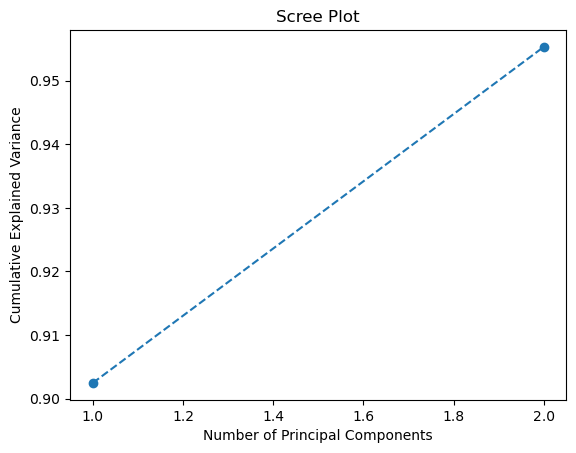

In [37]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [38]:
loadings = pca.components_[:2, :]
print("Loadings of PC1 and PC2:")
print(loadings)

Loadings of PC1 and PC2:
[[-0.06581888 -0.06417033 -0.06381924 -0.06616059 -0.06453746 -0.06199485
  -0.0658139  -0.0658421  -0.06157506 -0.05704168 -0.06417188 -0.06381267
  -0.06234098 -0.06544936 -0.06640372 -0.06338178 -0.06439599 -0.0625606
  -0.0660328  -0.06620008 -0.06655679 -0.05957025 -0.06328754 -0.05844657
  -0.06083646 -0.06568619 -0.06456153 -0.06407502 -0.06558571 -0.05645564
  -0.06437543 -0.06430893 -0.06422303 -0.06301357 -0.0642345  -0.06528806
  -0.06596612 -0.06130054 -0.06596424 -0.06618737 -0.06486791 -0.06370995
  -0.06623996 -0.06381087 -0.06108222 -0.06181762 -0.06181925 -0.06440951
  -0.06625428 -0.06602235 -0.06638076 -0.06073774 -0.06040026 -0.06330601
  -0.06385241 -0.06361503 -0.06617321 -0.06612237 -0.06152964 -0.06399422
  -0.06546233 -0.06293175 -0.0615872  -0.06469671 -0.06177838 -0.06227766
  -0.05723974 -0.06330724 -0.0642216  -0.06422441 -0.06248758 -0.06679729
  -0.06386679 -0.05682777 -0.05970676 -0.05385485 -0.06021475 -0.06541733
  -0.06421716 

### **`Principal Component Analysis (Variables)`** <a id="pcav"></a>

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_variables) 

n_components = 2  
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # Update column names as needed

In [40]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratios: [0.55569293 0.19125766]
Cumulative Explained Variance: [0.55569293 0.74695059]


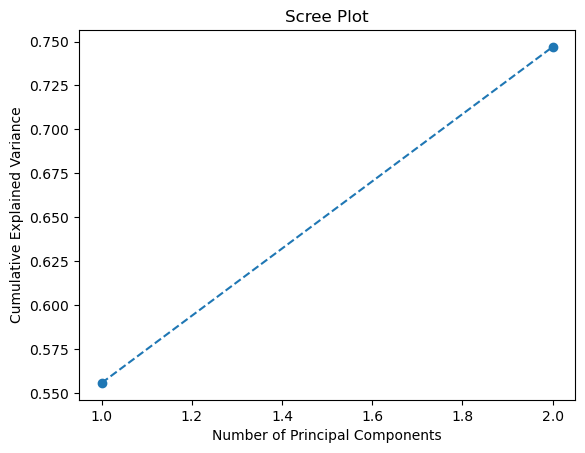

In [41]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [42]:
loadings = pca.components_[:2, :]
print("Loadings of PC1 and PC2:")
print(loadings)

Loadings of PC1 and PC2:
[[ 0.26917467  0.50738575  0.48213108  0.49267351  0.44150553]
 [-0.84854595  0.17749972  0.36136673  0.18586491 -0.28867271]]
